In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("loan_approved (1)(in).csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#Get top 5 rows
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Get bottom 5 rows
data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#Used to tell about basic stats on numerical columns
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents  ... Loan_Amount_Term Credit_History  Property_Area  Loan_Status (Approved)
0    LP001002    Male      No          0  ...            360.0            1.0          Urban                       Y
1    LP001003    Male     Yes          1  ...            360.0            1.0          Rural                       N
2    LP001005    Male     Yes          0  ...            360.0            1.0          Urban                       Y
3    LP001006    Male     Yes          0  ...            360.0            1.0          Urban                       Y
4    LP001008    Male      No          0  ...            360.0            1.0          Urban                       Y
..        ...     ...     ...        ...  ...              ...            ...            ...                     ...
609  LP002978  Female      No          0  ...            360.0            1.0          Rural                       Y
610  LP002979    Male     Yes   

In [9]:
#Tells about number of null values
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [10]:
#Dropping the null values
data.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
#split the data into train test sets
x = data.drop('Loan_Status (Approved)',axis=1)
y = data['Loan_Status (Approved)']#target variable
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

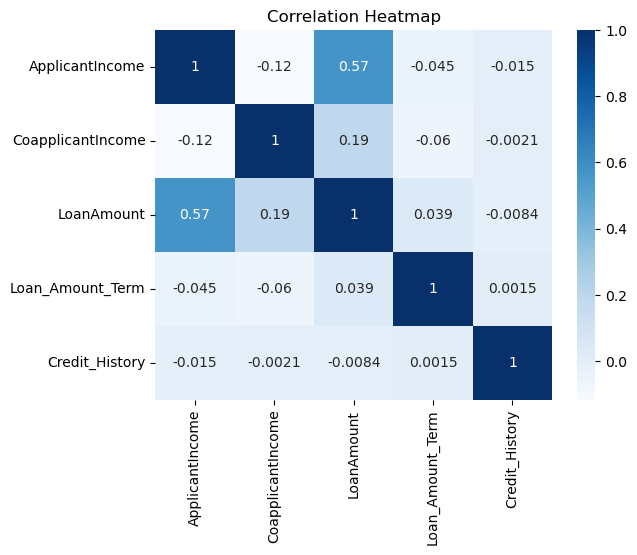

In [20]:
# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
#Diagonal values are always 1 - a variable is perfectly correlated with itself
#Darker blue means Stronger positive correlation.
#Light color means Weak  no correlation.

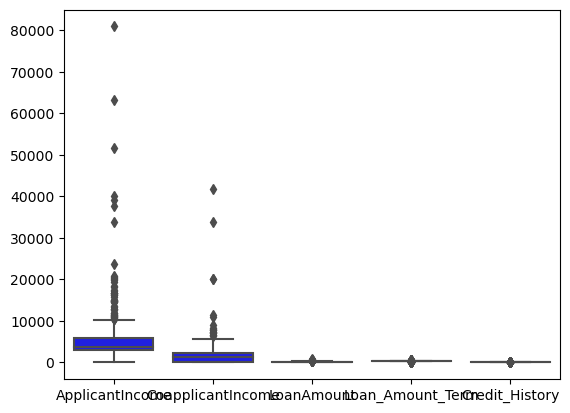

In [25]:
sns.boxplot(data[numerical_cols],color = 'blue')
plt.show()

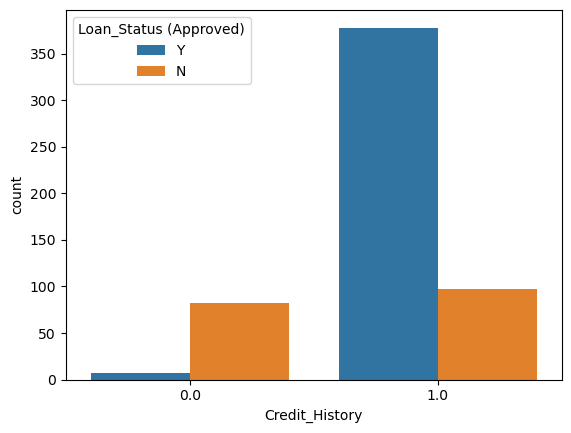

In [27]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status (Approved)')
plt.show()

In [28]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']=0.0

In [30]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History             0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [31]:
mode_value = data['Credit_History'].mode()[0]
data['Credit_History'].fillna(mode_value, inplace=True)

In [32]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History             0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [33]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [34]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History             0
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [35]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [36]:
data.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

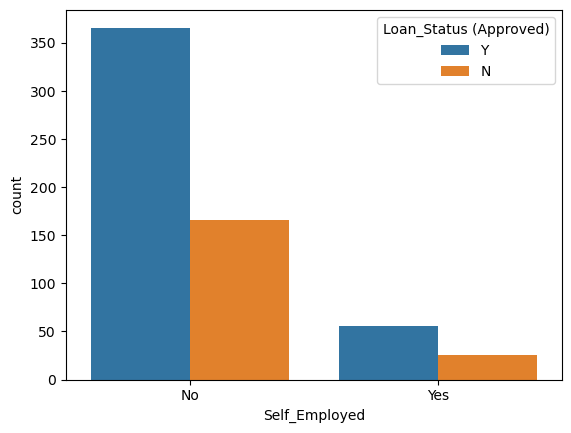

In [37]:
sns.countplot(x='Self_Employed',data=data,hue='Loan_Status (Approved)')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


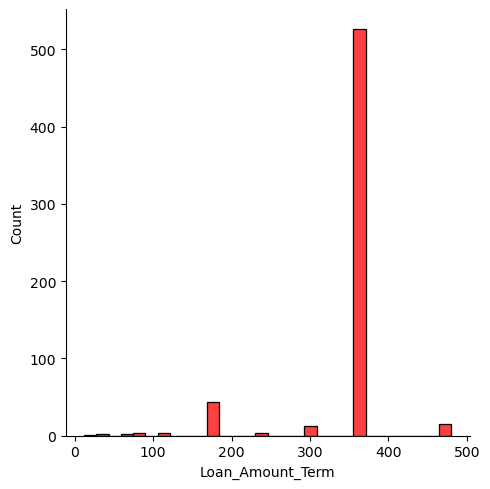

In [45]:
sns.displot(data['Loan_Amount_Term'], kde = False, color ='red', bins = 30)
plt.show()

In [48]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

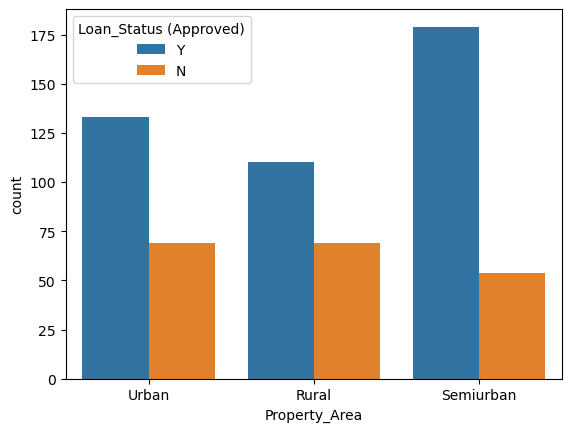

In [49]:
sns.countplot(x='Property_Area',data=data,hue='Loan_Status (Approved)')
plt.show()

In [50]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [57]:
data.groupby(['Loan_Status (Approved)','Property_Area']).count()

Loan_ID  Gender  Married  ...  LoanAmount  Loan_Amount_Term  Credit_History
Loan_Status (Approved) Property_Area                            ...                                              
N                      Rural               69      69       69  ...          69                69              69
                       Semiurban           54      54       54  ...          54                54              54
                       Urban               69      69       69  ...          69                69              69
Y                      Rural              110     110      110  ...         110               110             110
                       Semiurban          179     179      179  ...         179               179             179
                       Urban              133     133      133  ...         133               133             133

[6 rows x 11 columns]

In [60]:
data['Property_Area'] = data['Property_Area'].fillna('Urban')

In [62]:
data['Property_Area'].isnull().sum()

0

# outliers

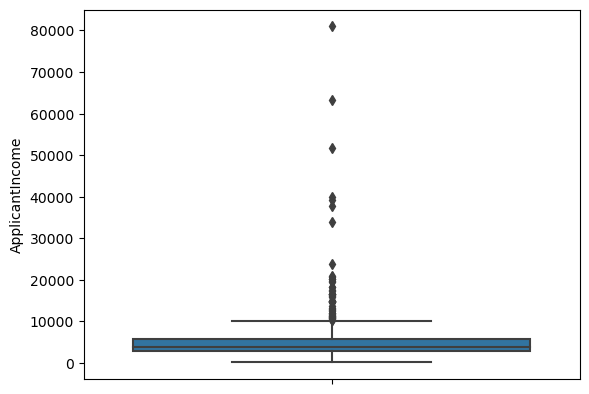

In [68]:
sns.boxplot(y=data['ApplicantIncome'])
plt.show()

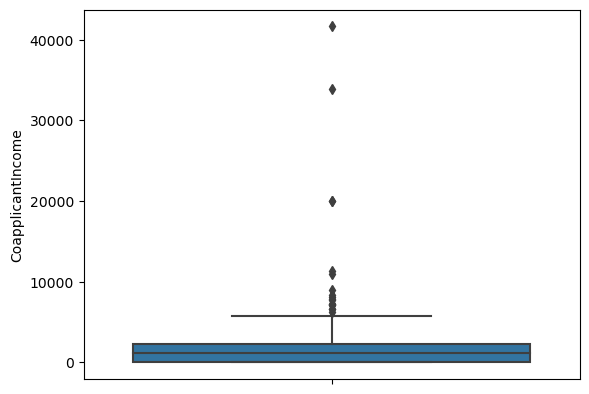

In [69]:
sns.boxplot(y=data['CoapplicantIncome'])
plt.show()

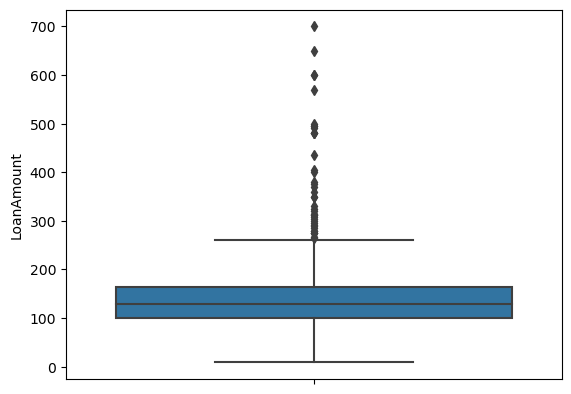

In [70]:
sns.boxplot(y=data['LoanAmount'])
plt.show()

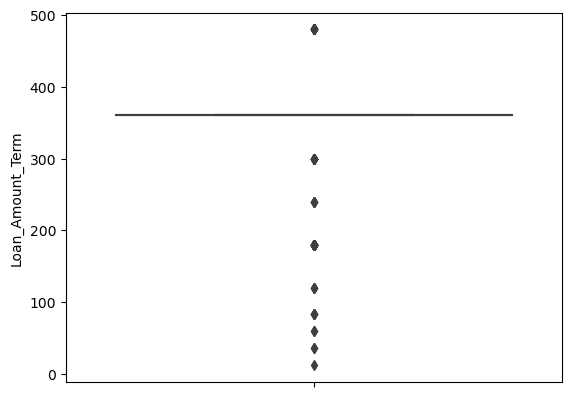

In [71]:
sns.boxplot(y=data['Loan_Amount_Term'])
plt.show()

In [72]:
col = data['ApplicantIncome']

In [73]:
# Calculate Q1, Q3, and IQR
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1

In [74]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [75]:
filtered_data = data[(col >= lower_bound) & (col <= upper_bound)]

In [76]:
print("Original size:", len(data))
print("Filtered size:", len(filtered_data))

Original size: 614
Filtered size: 564


In [ ]:
col = data['ApplicantIncome']